# Assignment 5a - Deep Learning

In this assignment, you will

1. Load cifar10 image dataset from TensorFlow and process it.
1. Build an image classifier based on the given model structure.
1. Train the model and plot the learning curves with respect to the number of epochs. 
1. Evaluate the model on the test set. Report performance metrics.
1. Discuss your findings.
1. (Optional - not graded) Try different model structure or parameters, report your results and discuss your findings.

## Your Information

**Name:** Jane Downer<br>
**CWID:** A20452471<br>
**Section:** 02<br>

In [1]:
import tensorflow as tf
from   tensorflow.keras import datasets, layers, models
from   tensorflow.keras.models import Sequential
from   tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, AveragePooling2D
from   tensorflow.keras.optimizers import Adam
from   time import time
import numpy as np
import matplotlib.pyplot as plt
from   sklearn.metrics import classification_report

## Dataset

Download the dataset from TensorFlow using tf.keras.datasets.cifar10.load_data() function.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

Normalize pixel values (between 0 and 255) to be between 0 and 1.

Note: this part of the code has already been provided.

In [2]:
(train_images, y_train), (test_images, y_test) = datasets.cifar10.load_data()
X_train, X_test = train_images/255.0, test_images/255.0

## Model Structure

Use Sequential API (https://www.tensorflow.org/guide/keras/sequential_model) to build a model with the following structure:

1. Conv2D Layer (128 filters, 3\*3 kernel, 1\*1 strides, 'same' padding, 'relu' activation)

1. MaxPool2D Layer (2\*2 pool size)

1. Conv2D Layer (64 filters, 3\*3 kernel, 1\*1 strides, 'same' padding, 'relu' activation)

1. MaxPool2D Layer (2\*2 pool size)

1. Conv2D Layer (32 filters, 3\*3 kernel, 1\*1 strides, 'same' padding, 'relu' activation)

1. AveragePooling2D Layer (3\*3 pool size)

1. Flatten Layer

1. Dense Layer (32 units, 'relu' activation)

1. Dense Layer (10 units, 'softmax' activation)

In [3]:
# TODO

model = models.Sequential()
model.add(layers.Conv2D(filters=128,
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same',
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same',
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=32, 
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same',
                        activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(tf.keras.layers.Dense(
                        units=32,
                        activation='relu'))
model.add(tf.keras.layers.Dense(
                        units=10,
                        activation='softmax'))

Metal device set to: Apple M1 Pro


2022-04-03 21:58:39.393952: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-03 21:58:39.394210: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Model Training

Set Adam with learning rate 1e-3 as the optimizer, sparse categorical crossentropy as the loss function and accuracy as the metrics to compile the model.

Set the number of epochs to 20, validation_split to 0.2, and then fit the model.

In [4]:
# TODO
model.compile(optimizer = 'adam',
              loss      = 'sparse_categorical_crossentropy',
              metrics   = 'accuracy')

history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    validation_split=0.2)

Epoch 1/20


2022-04-03 21:58:40.274195: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-03 21:58:40.881415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - ETA: 0s - loss: 1.6060 - accuracy: 0.4115

2022-04-03 21:58:56.623357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1250/1250 [==============================] - 19s 12ms/step - loss: 1.6060 - accuracy: 0.4115 - val_loss: 1.4264 - val_accuracy: 0.4868
Epoch 2/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.2179 - accuracy: 0.5666 - val_loss: 1.1548 - val_accuracy: 0.5946
Epoch 3/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0571 - accuracy: 0.6277 - val_loss: 0.9856 - val_accuracy: 0.6571
Epoch 4/20
1250/1250 [==============================] - 15s 12ms/step - loss: 0.9524 - accuracy: 0.6647 - val_loss: 0.9579 - val_accuracy: 0.6681
Epoch 5/20
1250/1250 [==============================] - 15s 12ms/step - loss: 0.8886 - accuracy: 0.6877 - val_loss: 0.9226 - val_accuracy: 0.6828
Epoch 6/20
1250/1250 [==============================] - 15s 12ms/step - loss: 0.8309 - accuracy: 0.7074 - val_loss: 0.8921 - val_accuracy: 0.6909
Epoch 7/20
1250/1250 [==============================] - 15s 12ms/step - loss: 0.7820 - accuracy: 0.7252 - val_loss: 0.8477 - val_accura

## Visualization

Get the loss and accuracy on training set and validation set by accessing ``model.history.history``

Plot the two loss curves where the x axis is the number of epochs and y axis is the loss.

Plot the two accuracy curves where the x-axis is the number of epochs and y-axis is the accuracy.

In [5]:
list(history.history.keys())

['loss', 'accuracy', 'val_loss', 'val_accuracy']

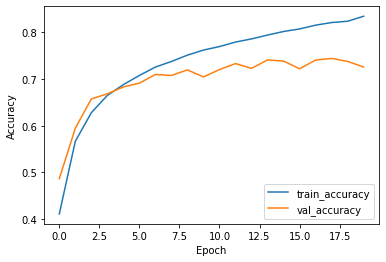

In [6]:
# Accuracy - given
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

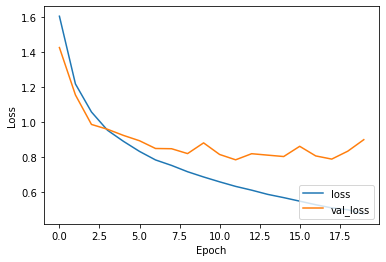

In [7]:
# Loss
# TODO
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

## Evaluation

Evaluate on the test set, print the classification report using sklearn.metrics.classification_report. Make sure you provide the label names for each class.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [22]:
# TODO
pred = model.predict(x=X_test)


def predict(output):
    preds = []
    for o in output:
        preds.append(o.tolist().index(max(o)))
    return preds


predictions = predict(pred)

y_true =  y_test
y_pred = np.asarray(predictions)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1000
           1       0.84      0.82      0.83      1000
           2       0.70      0.56      0.62      1000
           3       0.52      0.57      0.55      1000
           4       0.67      0.63      0.65      1000
           5       0.63      0.62      0.63      1000
           6       0.92      0.64      0.75      1000
           7       0.62      0.87      0.72      1000
           8       0.86      0.82      0.84      1000
           9       0.74      0.88      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.73      0.71      0.71     10000
weighted avg       0.73      0.71      0.71     10000



In [23]:
results = model.evaluate(x=X_test,y=y_test)
print('Loss: {}\nAccuracy: {}'.format(results[0],results[1]))

313/313 [==============================] - 2s 7ms/step - loss: 0.9126 - accuracy: 0.7144
Loss: 0.9125737547874451
Accuracy: 0.714400053024292


## Final Discussion

### Discuss your findings. 

**1. General discussion**<br>
**2. Which class has the highest F1-score? Discuss the possible reasons.**<br>
**3. Which class has the lowest F1-score? Discuss the possible reasons.**<br>
**4. Any thoughts on why this structure might or might not be a good structure?**

1. Validation loss decreases and then levels out, and training loss is still decreasing after 20 epochs. We have not overfit the model, and *will* not overfit until we notice validation loss increasing. Accuracy reaches about 71%, which is ok, but could be better.
 
F1-scores:

The classes are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. I would imagine that it is easier for the model to distinguish between the various types of vehicles than it is to distinguish between the various types of animals (there are 4 four-legged animals in the 5 animal classes), and I would also imagine that it would be relatively easy to distingiuish between animals and vehicles in general. Therefore, I predict that vehicles will generally have higher F1 scores than animals.


2.  Class 8 (ship) and Class 2 (automobile) are almost tied for highest F1 score. It is possible that it is easier to detect and correctly identify ships and cars more than it is other vehicles, which makes sense to me, as their shapes are simpler.<br><br>

3. The class with the lowest F1-score is class 3 (cat). Again, I would imagine that it is easier to detect and identify vehicles than it is for animals. Sure enough, vehicles have an average F1 score of 0.795, and animals have an average F1 score of 0.653. It's unclear to me what would make cats more difficult to identify than other animals, but it probably doesn't help that four out of six animals are four-legged mammals.


`vehical_scores = [0.71,0.83,0.84,0.8]`

`animal_scores  = [0.62,0.55,0.65,0.63,0.75,0.72]`

4. I would be interested to increase the number of training epochs, since validation loss does not yet begin to increase and training loss has not yet leveled off. I would also be interested to train the model on two categories at a time to see if distinguishing between two categories is particularly difficult for specific classes.

## Optional Step

This step will not be graded.

Try different model structure or parameters, report your results and discuss your findings.